ISMB 2024 Tutorial: Multi-omic data integration for microbiome research using scikit-bio

# Section 01: Basic bioinformatics using scikit-bio

- Time: 9:00 - 10:00 EDT, Jul 11, 2024
- Instructor: Matthew Aton

---

Welcome to the tutorial for using the Python package **scikit-bio** (https://scikit.bio) for omic data analysis and microbiome research! This section serves as an introduction to scikit-bio. It will guide you through the installation, and give you the first glimpse of scikit-bio's flavor and functionality by walking through a very basic series of bioinformatic analyses: sequence, alignment, and phylogeny.

## Preparation

### Setup system

This and all subsequent notebooks in the tutorial may be executed either via [Google Colab](https://colab.research.google.com/) (remotely) or via a local [Jupyter](https://jupyter.org/) environment.

#### 1. Google Colab

You just need a Google account.

- To enabled Google Colab (if you haven't), navigate to your Google Drive, click "New" => "More" => "Connect more apps". Search for "Colaboratory". Install it. Then you will be able to open a notebook in your Drive by double-clicking it.

#### 2. Local Jupyter

You need a computer that runs Linux, MacOS or Windows.

Execute the following code in a terminal. It will create a [Conda](https://docs.conda.io/en/latest/index.html) environment, install necessary software, and launch Jupyter Lab.

```bash
conda create -n skbio-tutorial -c conda-forge scikit-bio jupyter matplotlib scikit-learn
conda activate skbio-tutorial
jupyter lab
```

Then locate and open individual notebooks of the tutorial.

### Install scikit-bio

scikit-bio can be installed via various sources, such as PyPI, conda-forge and GitHub. Detailed installation instructions are provided at: https://scikit.bio/install.html.

The following code will check if scikit-bio is already installed in the system. If not, it will install it via PyPI.

- If you use Google Colab, installation is necessary for each notebook.
- If you use local Jupyter, scikit-bio only needs to be installed once.

In [1]:
from importlib.util import find_spec

In [2]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

Check if scikit-bio can be imported into Python.

In [3]:
import skbio
skbio.__version__

'0.6.2-dev'

### Access data files

Data files to be used during the tutorial may be accessed via any of the three methods, depending on your preference.

#### 1. Download as needed during the tutorial

Each notebook in this tutorial contains the code to download and extract the necessary data package from Dropbox. This means you don't have to do anything in advance, but simply execute each notebook. This works for both Google Colab and local Jupyter.

In [4]:
!wget -q -O intro.tar.gz "https://www.dropbox.com/scl/fi/1oou3hrzebog6jhb06nqq/intro.tar.gz?rlkey=8lt3oabfkdp738xy4wy5cdg1t&dl=0"
!tar zxf intro.tar.gz

In [5]:
HOME = 'intro'

#### 2. Remote access via Google Drive

All tutorial files, including notebooks, slides and data files, are provided in the following public Google Drive folder:

- https://drive.google.com/drive/folders/1YSpEBHrGM_fjmiN5NpwdgLL3WtT0VTsy?usp=sharing

If you use Google Colab, you have the option to directly mount this folder and access its content. This avoids the necessity of downloading anything during the tutorial. However, you will need to grant permissions of your Google Drive to the Google Colab notebooks.

- Access the folder, click the title => "Organize" => "Add Shortcut" => "All Locations" => "My Drive" => "Add". This will add a shortcut to the folder in your Google Drive. (You may adjust the location as needed.)

Mount Google Drive (uncomment the code to execute it):

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

Specify the path to the data directory. It usually is:

In [7]:
# HOME = '/content/drive/MyDrive/skbio-ismb-2024/Data/intro'

#### 3. Download data package to local computer

The data files are also provided as three archives under the following public Dropbox folder:

- https://www.dropbox.com/scl/fo/euir18o3jb4pglljaxslo/AKNF1Lk3sQ52ZTn_A-z2sqc?rlkey=u72814al272kvu17rnozsr5jp&dl=0

You may download and extract the data files to a local directory of your computer prior to running all notebooks in the tutorial.

Specify the path to the data directory (you know where it is):

In [8]:
# HOME = '/home/drz/Desktop/Data/intro'

Finally, let's check if the directory exists by listing its content.

In [9]:
!ls $HOME

il6.ffn


Let's mute some warnings.

In [10]:
import warnings
warnings.filterwarnings('ignore')

## Reading sequences

The downloaded data package has a single file: `il6.ffn`. It is a [FASTA](https://en.wikipedia.org/wiki/FASTA_format) file containing the coding sequences (CDSes) of the [Interleukin 6](https://en.wikipedia.org/wiki/Interleukin_6) (**IL6**) gene of seven representative organisms.

- _Homo sapiens_ (human)
- _Pan troglodytes_ (chimp)
- _Macaca mulatta_ (monkey)
- _Sus scrofa_ (pig)
- _Mus musculus_ (mouse)
- _Rattus norvegicus_ (rat)
- _Gallus gallus_ (chicken)

We will read all sequences from the file into Python. These are DNA sequences. scikit-bio's [`DNA`](https://scikit.bio/docs/latest/generated/skbio.sequence.DNA.html) class can handle them.

In [11]:
from skbio import DNA

Since we ultimately want a list of `DNA` sequences, we instantiate an empty list and append each sequence to that list using a for loop and `skbio.io.read`. By setting the `constructor` parameter to `DNA`, read will automatically convert each sequence into a scikit-bio `DNA` object. For protein or RNA sequences, the constructor can be set to `Protein` or `RNA`, respectively.

In [12]:
seqs = []
for seq in skbio.io.read(f'{HOME}/il6.ffn', format='fasta', constructor=DNA):
    seqs.append(seq)

## Basic sequence types

scikit-bio supports the three basic sequence types of biology: DNA, RNA, and Protein. Additionally, each type of sequence may include optional metadata and positional metadata, which are each mutable.

We now have a list of sequences. Python list indexing can be used to show us the first two sequences in our list. They are the human and mouse IL6 coding regions. Let's explore each of these a bit more to see what functionality scikit-bio offers.

In [13]:
human = seqs[0]
human

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   ATGAACTCCT TCTCCACAAG CGCCTTCGGT CCAGTTGCCT TCTCCCTGGG GCTGCTCCTG
60  GTGTTGCCTG CTGCCTTCCC TGCCCCAGTA CCCCCAGGAG AAGATTCCAA AGATGTAGCC
...
540 GCACAGAACC AGTGGCTGCA GGACATGACA ACTCATCTCA TTCTGCGCAG CTTTAAGGAG
600 TTCCTGCAGT CCAGCCTGAG GGCTCTTCGG CAAATGTAG

In [14]:
mouse = seqs[1]
mouse

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'mouse'
Stats:
    length: 636
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 41.35%
---------------------------------------------------------------------
0   ATGAAGTTCC TCTCTGCAAG AGACTTCCAT CCAGTTGCCT TCTTGGGACT GATGCTGGTG
60  ACAACCACGG CCTTCCCTAC TTCACAAGTC CGGAGAGGAG ACTTCACAGA GGATACCACT
...
540 CAGAAGGAGT GGCTAAGGAC CAAGACCATC CAATTCATCT TGAAATCACT TGAAGAATTT
600 CTAAAAGTCA CTTTGAGATC TACTCGGCAA ACCTAG

The primary information stored for each type of sequence object is the underlying sequence data itself, which is stored as an immutable NumPy array of 8-bit integers. This uses ASCII encoding and offers significant performance gains compared to operating on the strings of letters which compose the sequences.

In [15]:
human._bytes[:100]

array([65, 84, 71, 65, 65, 67, 84, 67, 67, 84, 84, 67, 84, 67, 67, 65, 67,
       65, 65, 71, 67, 71, 67, 67, 84, 84, 67, 71, 71, 84, 67, 67, 65, 71,
       84, 84, 71, 67, 67, 84, 84, 67, 84, 67, 67, 67, 84, 71, 71, 71, 71,
       67, 84, 71, 67, 84, 67, 67, 84, 71, 71, 84, 71, 84, 84, 71, 67, 67,
       84, 71, 67, 84, 71, 67, 67, 84, 84, 67, 67, 67, 84, 71, 67, 67, 67,
       67, 65, 71, 84, 65, 67, 67, 67, 67, 67, 65, 71, 71, 65, 71],
      dtype=uint8)

Common operations are defined as methods, for example computing the **reverse complement** of a DNA sequence, or searching for N-glycosylation motifs in protein sequences. Class attributes provide valid character sets, complement maps for different sequence types, and degenerate character definitions.

In [16]:
human.reverse_complement()

DNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   CTACATTTGC CGAAGAGCCC TCAGGCTGGA CTGCAGGAAC TCCTTAAAGC TGCGCAGAAT
60  GAGATGAGTT GTCATGTCCT GCAGCCACTG GTTCTGTGCC TGCAGCTTCG TCAGCAGGCT
...
540 TCCTGGGGGT ACTGGGGCAG GGAAGGCAGC AGGCAACACC AGGAGCAGCC CCAGGGAGAA
600 GGCAACTGGA CCGAAGGCGC TTGTGGAGAA GGAGTTCAT

We can also **transcribe** and **translate** sequences with built-in methods of the sequence objects.

In [17]:
human.transcribe()

RNA
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 639
    has gaps: False
    has degenerates: False
    has definites: True
    GC-content: 50.23%
---------------------------------------------------------------------
0   AUGAACUCCU UCUCCACAAG CGCCUUCGGU CCAGUUGCCU UCUCCCUGGG GCUGCUCCUG
60  GUGUUGCCUG CUGCCUUCCC UGCCCCAGUA CCCCCAGGAG AAGAUUCCAA AGAUGUAGCC
...
540 GCACAGAACC AGUGGCUGCA GGACAUGACA ACUCAUCUCA UUCUGCGCAG CUUUAAGGAG
600 UUCCUGCAGU CCAGCCUGAG GGCUCUUCGG CAAAUGUAG

In [18]:
human.translate()

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'human'
Stats:
    length: 213
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MNSFSTSAFG PVAFSLGLLL VLPAAFPAPV PPGEDSKDVA APHRQPLTSS ERIDKQIRYI
60  LDGISALRKE TCNKSNMCES SKEALAENNL NLPKMAEKDG CFQSGFNEET CLVKIITGLL
120 EFEVYLEYLQ NRFESSEEQA RAVQMSTKVL IQFLQKKAKN LDAITTPDPT TNASLLTKLQ
180 AQNQWLQDMT THLILRSFKE FLQSSLRALR QM*

## Pairwise Alignment

scikit-bio provides methods for [sequence alignment](https://en.wikipedia.org/wiki/Sequence_alignment). We will start by showing the functionality of **local pairwise alignment** using the Striped Smith-Waterman (SSW) algorithm, as implemented in [`local_pairwise_align_ssw`](https://scikit.bio/docs/latest/generated/skbio.alignment.local_pairwise_align_ssw.html). The output of the function provides the alignment, the alignment score, and the start and end positions for the two sequences in the alignment.

- Upgrade of alignment algorithms in scikit-bio is currently in progress to make them more efficient and usable.

In [19]:
from skbio.alignment import local_pairwise_align_ssw

In [20]:
align, score, pos = local_pairwise_align_ssw(human, mouse)

/home/drz/Dropbox/scikit-bio/github/skbio/util/_warning.py:56: DeprecationWarning: local_pairwise_align_ssw is deprecated as of 0.5.8. It will be removed in favor of more general purpose and performant aligners. Additional details at https://github.com/scikit-bio/scikit-bio/issues/1814.
  warn(


In [21]:
score

138

In [22]:
pos

[(0, 563), (0, 559)]

The alignment is a tabular multiple sequence alignment ([`TabularMSA`](https://scikit.bio/docs/latest/generated/skbio.alignment.TabularMSA.html)) object. It is a data structure meant for intuitive manipulation and visualization of pairwise or multiple sequence alignments.

In [23]:
align

TabularMSA[DNA]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 588
-----------------------------------------------------------------------
ATGAACTCCTTCTCCACAAGCGCCTTCGGTCCA ... AAGCTGCAGGCACAGAACCAGTGGCTGCAGGAC
ATGAAGTTCCTCTCTGCAAGAGACTTCCATCCA ... AAGCTGGAGTCACAGAAGGAGTGGCT-AAGGAC

### Alignment path

scikit-bio further provides [`AlignPath`](https://scikit.bio/docs/latest/generated/skbio.alignment.AlignPath.html) (and its derivative `PairAlignPath`), a more memory and compute efficient data structure. It stores the alignment path but not the sequences.

In [24]:
from skbio.alignment import AlignPath, PairAlignPath

In [25]:
path = PairAlignPath.from_tabular(align)
path

<PairAlignPath, shape: Shape(sequence=2, position=np.int64(588)), CIGAR: '43M3D48M2D5M2I14M1I2M1D4M1I4M1D5M1I8M1D12M2I4M2D3M2I2M2I6M3D4M1D1M1D4M2D32M3I9M1D9M2D45M1D5M1I78M2D2M2I22M1D9M1I9M2I2M1I18M1D3M1I4M1I5M1D77M1I5M1D27M1D6M'>

The underlying data structure of an alignment path is two arrays: `lengths` and `states`. The `lengths` array represents the segment length for each segment with consistent gap status. The sum of the `lengths` array is equal to the number of the positions in the alignment, in our case 588.

In [26]:
path.lengths

array([43,  3, 48,  2,  5,  2, 14,  1,  2,  1,  4,  1,  4,  1,  5,  1,  8,
        1, 12,  2,  4,  2,  3,  2,  2,  2,  6,  3,  4,  1,  1,  1,  4,  2,
       32,  3,  9,  1,  9,  2, 45,  1,  5,  1, 78,  2,  2,  2, 22,  1,  9,
        1,  9,  2,  2,  1, 18,  1,  3,  1,  4,  1,  5,  1, 77,  1,  5,  1,
       27,  1,  6])

In [27]:
path.lengths.sum()

np.int64(588)

The `states` array represents the gap status of each individual segment in the alignment. For a pairwise alignment `0` means (mis)match, `1` means insertion, and `2` means deletion.

In [28]:
path.states

array([[0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2,
        0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1,
        0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1,
        0, 2, 0, 2, 0]], dtype=uint8)

A pairwise alignment path can be converted into a [CIGAR string](https://en.wikipedia.org/wiki/Sequence_alignment#CIGAR_Format).

In [29]:
path.to_cigar()

'43M3D48M2D5M2I14M1I2M1D4M1I4M1D5M1I8M1D12M2I4M2D3M2I2M2I6M3D4M1D1M1D4M2D32M3I9M1D9M2D45M1D5M1I78M2D2M2I22M1D9M1I9M2I2M1I18M1D3M1I4M1I5M1D77M1I5M1D27M1D6M'

If greater resolution is desired between match and mismatch (`=` and `X` vs `M` in CIGAR strings), you may pass the sequences to `to_cigar`.

In [30]:
path.to_cigar(seqs=[align[0], align[1]])

'5=1X1=1X1=1X4=2X4=1X1=1X4=2X14=3D4X1=3X2=2X2=1X2=1X2=1X1=2X1=2X1=3X1=4X1=2X1=3X2=3X2D5X2I2X2=4X1=5X1I2X1D4X1I2X1=1X1D1=2X1=1X1I1X1=1X1=4X1D5X1=3X1=2X2I4X2D2X1=2I2X2I2X1=3X3D4X1D1=1D2X1=1X2D6X2=11X1=2X1=1X2=2X2=1X1=3I1X1=4X1=2X1D7X1=1X2D2=20X1=1X1=5X3=7X1=4X1D1=3X1=1I2X1=6X1=4X2=1X2=15X1=4X1=7X1=2X1=8X1=6X1=1X1=1X1=2X1=1X1=2X2D1X1=2I7X1=1X3=10X1D9X1I1X1=1X1=2X1=2X2I2X1I4X1=5X1=1X1=2X1=2X1D3X1I4X1I2X2=1X1D2=1X1=4X2=8X1=4X2=2X1=8X1=4X2=2X1=1X1=5X2=10X1=1X2=4X2=1X1=1I3X2=1D1X1=1X1=11X2=7X2=1X1D6X'

### Substitution matrix

For protein sequence alignment, a [**substitution matrix**](https://en.wikipedia.org/wiki/Substitution_matrix) is usually used to define the scores of changes between amino acids. scikit-bio's [`SubstitutionMatrix`](https://scikit.bio/docs/latest/generated/skbio.sequence.SubstitutionMatrix.html) class provides this functionality.

In [31]:
from skbio import SubstitutionMatrix

Load a pre-defined substitution matrix, for example [BLOSUM62](https://en.wikipedia.org/wiki/BLOSUM). 

In [32]:
sm = SubstitutionMatrix.by_name('BLOSUM62')

The substitution matrix can be fed into the alignment algorithm.

In [33]:
sm_dict = substitution_matrix=sm.to_dict()

In [34]:
align, score, pos = local_pairwise_align_ssw(
    human.translate(), mouse.translate(), substitution_matrix=sm_dict)
align

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 2
    position count: 215
-----------------------------------------------------------------------
MNSFSTSAFGPVAFSLGLLLVLPAAFP-APVPP ... LQAQNQWLQDMTTHLILRSFKEFLQSSLRALRQ
MKFLSARDFHPVAF-LGLMLVTTTAFPTSQVRR ... LESQKEWLRTKTIQFILKSLEEFLKVTLRSTRQ

## Multiple Alignment

It is also possible to use scikit-bio to perform [multiple sequence alignment](https://en.wikipedia.org/wiki/Multiple_sequence_alignment). The following code demonstrates the procedures of [**progressive alignment**](https://en.wikipedia.org/wiki/Multiple_sequence_alignment#Progressive_alignment_construction) -- a classical strategy for aligning multiple sequences.

Here, we will first translate the sequences into protein, and align the protein sequences from the seven organisms. We also create a dictionary of the sequences where each key is the name of the organism, and each value is the `Protein` sequence of that organism. This step is necessary for the progressive alignment function we've written. As you see below, translation of all the sequences is possible in a single line of code using list comprehension.

In [35]:
prot_seqs = [seq.translate() for seq in seqs]

In [36]:
names = ('human', 'mouse', 'rat', 'chicken', 'pig', 'chimp', 'monkey')

In [37]:
prot_seqs_dict = {name: sequence for name, sequence in zip(names, prot_seqs)}

In [38]:
prot_seqs_dict['pig']

Protein
---------------------------------------------------------------------
Metadata:
    'description': ''
    'id': 'pig'
Stats:
    length: 213
    has gaps: False
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   MNSLSTSAFS PVAFSLGLLL VMATAFPTPG RLEEDAKGDA TSDKMLFTSP DKTEELIKYI
60  LGKISAMRKE MCEKYEKCEN SKEVLAENNL NLPKMAEKDG CFQSGFNQET CLMRITTGLV
120 EFQIYLDYLQ KEYESNKGNV EAVQISTKAL IQTLRQKGKN PDKATTPNPT TNAGLLDKLQ
180 SQNEWMKNTK IILILRSLED FLQFSLRAIR IM*

### Distance matrix

Now with all of our sequences translated we can build a [**distance matrix**](https://en.wikipedia.org/wiki/Distance_matrix) among them. scikit-bio's [`DistanceMatrix`](https://scikit.bio/docs/latest/generated/skbio.stats.distance.DistanceMatrix.html) class provides a convenient interface for working with distance matrices. Among its various functionality, we will use the [`from_iterable`](https://scikit.bio/docs/latest/generated/skbio.stats.distance.DistanceMatrix.from_iterable.html) method to automatically create a distance matrix for all pairs of items in a Python iterable, in this case the list of sequences.

In [39]:
from skbio import DistanceMatrix

We will define a function that calculates the distance between a pair of items. Here, we will perform pairwise sequence alignment, then calculate the [Hamming distance](https://en.wikipedia.org/wiki/Hamming_distance) between the aligned sequences.

In [40]:
from skbio.sequence.distance import hamming

In [41]:
def align_dist(seq1, seq2):
    aln = local_pairwise_align_ssw(seq1, seq2, substitution_matrix=sm_dict)[0]
    return hamming(aln[0], aln[1])

Build a distance using just one line of code:

In [42]:
dm = DistanceMatrix.from_iterable(prot_seqs, align_dist, key='id', validate=False)

By typing `dm` you will see a heatmap representing the distance matrix.

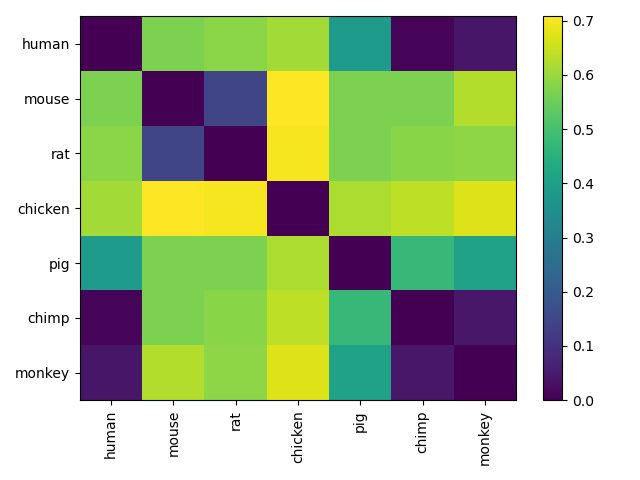

In [43]:
dm

The underlying data of the distance matrix is a 2D array.

In [44]:
dm.data

array([[0.        , 0.56744186, 0.58411215, 0.60952381, 0.38497653,
        0.00657895, 0.03947368],
       [0.56744186, 0.        , 0.14622642, 0.70813397, 0.56807512,
        0.56862745, 0.62694301],
       [0.58411215, 0.14622642, 0.        , 0.69711538, 0.56807512,
        0.58169935, 0.58823529],
       [0.60952381, 0.70813397, 0.69711538, 0.        , 0.62200957,
        0.63761468, 0.67094017],
       [0.38497653, 0.56807512, 0.56807512, 0.62200957, 0.        ,
        0.47395833, 0.40880503],
       [0.00657895, 0.56862745, 0.58169935, 0.63761468, 0.47395833,
        0.        , 0.04347826],
       [0.03947368, 0.62694301, 0.58823529, 0.67094017, 0.40880503,
        0.04347826, 0.        ]])

Pairwise distances can be accessed using their IDs.

In [45]:
dm['human', 'mouse']

np.float64(0.5674418604651162)

### Guide tree

Once we've created our distance matrix, we can generate a tree based on this matrix using any [distance-based methods](https://en.wikipedia.org/wiki/Computational_phylogenetics#Distance-matrix_methods). This tree will serve as the _guide tree_ for the progressive alignment algorithm.

We will use SciPy's [`average`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.average.html) function, which implements the [**UPGMA**](https://en.wikipedia.org/wiki/UPGMA) method (a hierarchical clustering method that is also widely used in phylogenetics). The return value is a _linkage matrix_.

In [46]:
from scipy.cluster.hierarchy import average

In [47]:
guide_lm = average(dm.condensed_form())

scikit-bio's [`TreeNode`](https://scikit.bio/docs/latest/generated/skbio.tree.TreeNode.html) class is a versatible interface for working with tree structures, with various enhancements for _phylogenetic trees_. It can convert a linkage matrix into a tree.

In [48]:
from skbio import TreeNode

In [49]:
guide_tree = TreeNode.from_linkage_matrix(guide_lm, dm.ids)

Print an ASCII art of the tree. Does it make sense?

In [50]:
print(guide_tree.ascii_art())

          /-chicken
         |
---------|                    /-mouse
         |          /--------|
         |         |          \-rat
          \--------|
                   |          /-pig
                    \--------|
                             |          /-monkey
                              \--------|
                                       |          /-human
                                        \--------|
                                                  \-chimp


### Progressive alignment

Here we define our progressive alignment function. In this algorithm, proximal sequences and groups of sequences are sequentially merged via pairwise alignment, following the order defined by the guide tree. The slower but more versatible `global_pairwise_align_protein` function will be used.

In [51]:
from skbio.alignment import global_pairwise_align_protein

In [52]:
def progressive_msa(query_seqs, guide_tree):
    c1, c2 = guide_tree.children

    if c1.is_tip():
        c1_aln = query_seqs[c1.name]
    else:
        c1_aln = progressive_msa(query_seqs, c1)

    if c2.is_tip():
        c2_aln = query_seqs[c2.name]
    else:
        c2_aln = progressive_msa(query_seqs, c2)

    return global_pairwise_align_protein(
        c1_aln, c2_aln, substitution_matrix=sm_dict)[0]

Here we perform progressive alignment. By default, the alignment programs in scikit-bio will return `TabularMSA` objects. As mentioned previously, these are intuitive data structures and have several built-in methods which are useful.

In [53]:
msa = progressive_msa(prot_seqs_dict, guide_tree)

In [54]:
msa

TabularMSA[Protein]
-----------------------------------------------------------------------
Stats:
    sequence count: 7
    position count: 276
-----------------------------------------------------------------------
-------------------------------MN ... ITMHLILRDFTSFMEKTVRAVRYLKKTRSFSA*
--------------------------------- ... KTIQFILKSLEEFLKVTLRSTRQT*--------
...
--------------------------------- ... MTTHLILRSFKEFLQSSLRALRQM*--------
MNSVSTSKCRKSLALELPAAVEPCVREGCVAQG ... HFQKRRLQVNKRV*-------------------

We can also convert the `TabularMSA` object into an `AlignPath` object like we did earlier. `AlignPath` objects are exactly like `PairAlignPath` objects except that they don't have a few methods which are specific to pairwise alignments (e.g., CIGAR). The underlying data structure is the same, and can be quite useful.

In [55]:
msa_path = AlignPath.from_tabular(msa)

In [56]:
msa_path.lengths

array([31, 21,  2,  2,  2,  8,  2,  1, 36,  1, 81,  1,  3,  1, 20,  3, 42,
       11,  8])

In [57]:
msa_path.states

array([[ 47,  46,   6,   0,  40,   0,   1,   6,   0,   6,   0,   1,   0,
        120,   0,  80,   0,  80, 126]], dtype=uint8)

## Alignment exploration

We can next get some information about this alignment. For example, we can easily see that there are 7 sequences in this alignment, and that it's 276 characters long. By definition, there is no variance in sequence length in a multiple sequence alignment. For this reason, it's common to think of an alignment as a matrix or table, where rows represent sequences and columns represent positions in the sequences.

In [58]:
msa.shape

Shape(sequence=7, position=276)

In [59]:
msa.index

RangeIndex(start=0, stop=7, step=1)

Here we can see what the consensus sequence among the alignment is by calling the `consensus` method.

In [60]:
msa.consensus()

Protein
---------------------------------------------------------------------
Stats:
    length: 276
    has gaps: True
    has degenerates: False
    has definites: True
    has stops: True
---------------------------------------------------------------------
0   ---------- ---------- ---------- ---------- ---------- --MRSLFLST
60  GAFGPVAFSL GLLLVLAAAF PAPVPPGEDS KDDAAPHRQP LTSSERIDKL IRYILDGISA
120 LRKETCNKSN MCENSKEALA ENNLNLPKMA EKDGCFQSGF NEETCLVKII TGLLEFEVYL
180 EYLQNRFESS E-EQARAVQM STKVLIQFLQ QKVKNLDKIV FPDPTSNADL LDKLESQNEW
240 LQCHTIHLIL RSLEEFLKVT LRATRQM*-- ------

We can also explore some more interesting features of this alignment. For example, we can compute [**conservation**](https://en.wikipedia.org/wiki/Conserved_sequence) for each position in the alignment using the [`conservation`](https://scikit.bio/docs/latest/generated/skbio.alignment.TabularMSA.conservation.html) method. It calculates positional conservation using the inverse Shannon uncertainty metric.

In [61]:
conserv = msa.conservation(gap_mode='include')

We get an array of positional conservation values (here we'll just print the first ten). A low conservation value means that there is a lot of variation in the sequences at the corresponding position in the alignment, while a high conservation value means that the corresponding position in the alignment is highly conserved. A conservation of 1.0 means that a position is perfectly conserved. A conservation of 0.0 means that every character in the alphabet is present in exactly equal frequency at that position in the alignment (this is uncommon in practice).

In [62]:
conserv[100:110]

array([0.59271675, 0.86920202, 0.6951996 , 0.74603313, 0.59271675,
       0.59271675, 0.59271675, 0.65587811, 0.59271675, 0.6951996 ])

In our alignment, there are 28 positions that are perfectly conserved across all sequences.

In [63]:
(conserv == 1.0).sum()

np.int64(28)

Let's figure out what amino acids are at these perfectly conserved positions:

In [64]:
res = []
for i, value in enumerate(conserv):
    if value == 1.0:
        res.append((i, str(msa[0][i])))

In [65]:
print(res)

[(64, 'P'), (69, 'L'), (71, 'L'), (73, 'L'), (78, 'A'), (80, 'P'), (123, 'E'), (125, 'C'), (131, 'C'), (138, 'L'), (141, 'N'), (142, 'N'), (143, 'L'), (145, 'L'), (146, 'P'), (152, 'D'), (153, 'G'), (154, 'C'), (158, 'G'), (164, 'C'), (165, 'L'), (171, 'G'), (172, 'L'), (178, 'Y'), (179, 'L'), (201, 'T'), (204, 'L'), (249, 'L')]


Finally we can visualize the conservation along the full length of the alignment to get an idea of where the more and less conserved positions are found. In general, positions that are highly conserved are thought to have specific structural or functional roles in the protein, while positions that are less conserved might have less specific roles (e.g., providing a filler between two functional domains in the linear protein backbone).

In [66]:
import matplotlib.pyplot as plt

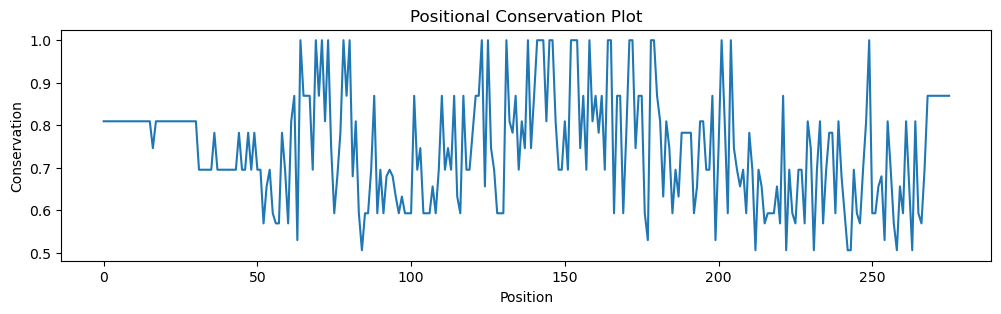

In [67]:
plt.figure(figsize=(12, 3))
plt.plot(range(len(conserv)), conserv)
plt.xlabel('Position')
plt.ylabel('Conservation')
plt.title('Positional Conservation Plot');

## Phylogenetics

With a multiple sequence alignment, one can reconstruct a [**phylogenetic tree**](https://en.wikipedia.org/wiki/Phylogenetic_tree) to model the evolutionary relationships among the organisms. A variety of computational methods exist for this task. Here, we will demonstrate one of the simplest yet scalable methods.

First, let's also build a distance matrix based on the Hamming distances among alignment sequences. The difference of this distance matrix from the previous one is that it is based on the multiple sequence alignment , rather than separate pairwise alignments. Therefore it is presumably more accurate.

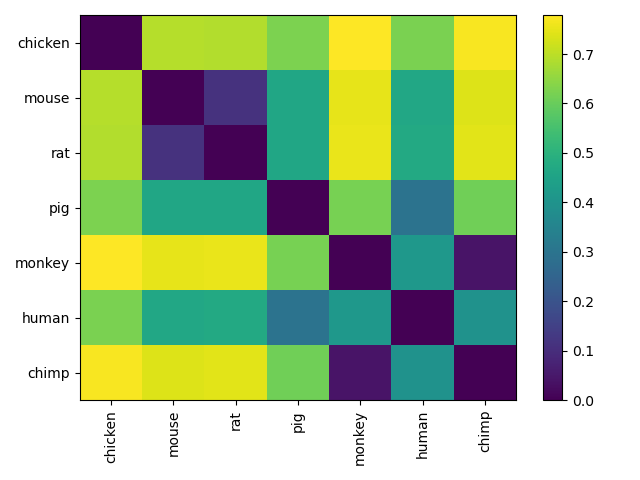

In [68]:
dm_msa = DistanceMatrix.from_iterable(msa, hamming, key='id', validate=False)
dm_msa

Then we will call [**neighbor joining**](https://en.wikipedia.org/wiki/Neighbor_joining), a classical distance-based phylogenetic reconstruction method. It is implemented in scikit-bio's [`nj`](https://scikit.bio/docs/latest/generated/skbio.tree.nj.html) function.

In [69]:
from skbio.tree import nj

In [70]:
tree = nj(dm)

Unlike UPGMA, the output of neighbor-joining is an unrooted tree. We will perform mid-point rooting on it.

In [71]:
tree = tree.root_at_midpoint()

Explore the tree. One can assess whether / to what extent the tree topology aligns with our knowledge of vertebrate evolution, and make relevant interpretations.

In [72]:
print(tree.ascii_art())

          /-chicken
         |
-root----|                    /-rat
         |          /--------|
         |         |          \-mouse
          \--------|
                   |          /-pig
                    \--------|
                             |          /-monkey
                              \--------|
                                       |          /-human
                                        \--------|
                                                  \-chimp


## Summary

This first section of the scikit-bio tutorial introduces the installation of scikit-bio, the setup of the practice environment, and demonstrates the basic usage of scikit-bio via a series of bioinformatics analyses: sequence, alignment, and phylogeny. The content serves as the basis for more sophisticated omic data analyses, as will be demonstrated in subsequent sections.